In [1]:
import warnings

warnings.filterwarnings('ignore')
import stereo as st

In [2]:
data_path = 'Desktop/GerardoIga/2024/Satish/Spatial/A02883D6.tissue.gef'

st.io.read_gef_info(data_path)

data = st.io.read_gef(file_path=data_path, bin_size=200)

[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1331][INFO]: This is GEF file which contains traditional bin infomation.
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1332][INFO]: bin_type: bins
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1335][INFO]: Bin size list: ['bin1']
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1341][INFO]: Resolution: 500
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1344][INFO]: Gene count: 21870
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1353][INFO]: offsetX: 2
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1356][INFO]: offsetY: 1
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1359][INFO]: Width: 26457
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1362][INFO]: Height: 26455
[2025-09-15 11:34:41][Stereo][90216][MainThread][92580][reader][1365][INFO]: Max Exp: 15
[2025-09-15 11:34:41][Stereo][90216]

In [3]:
# Preprocessing
data.tl.cal_qc()

[2025-09-15 11:35:03][Stereo][90216][MainThread][92580][st_pipeline][41][INFO]: start to run cal_qc...
[2025-09-15 11:35:03][Stereo][90216][MainThread][92580][st_pipeline][44][INFO]: cal_qc end, consume time 0.0878s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

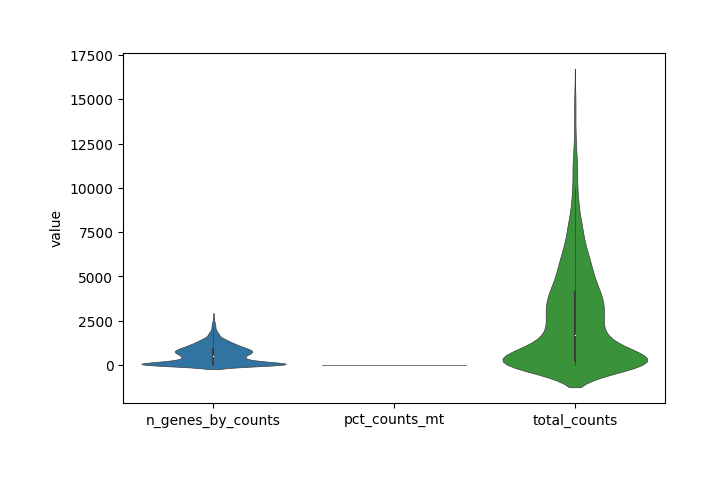

In [4]:
data.plt.violin()


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

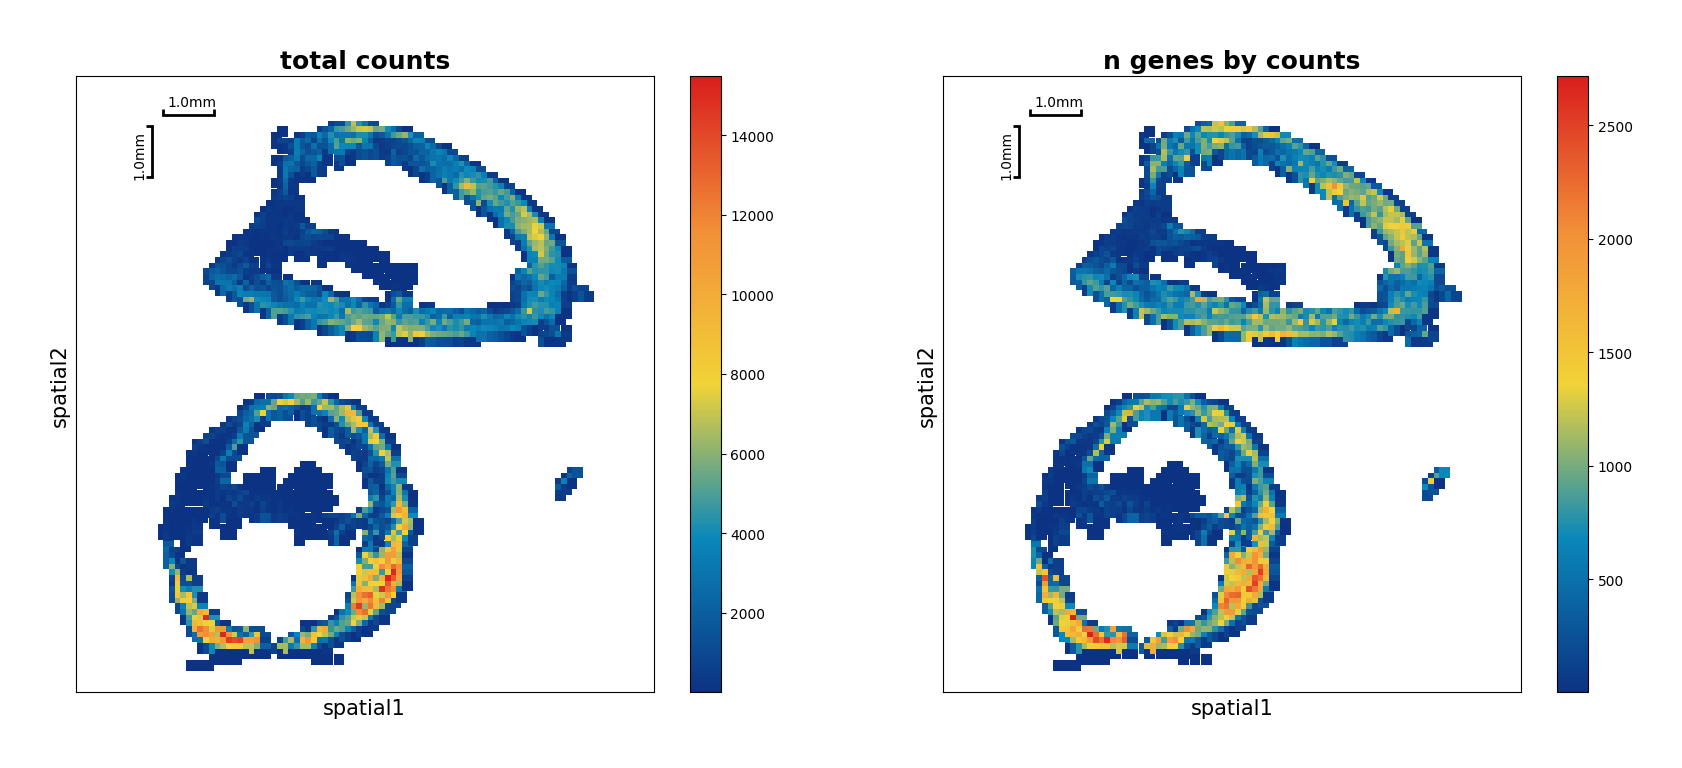

In [5]:
data.plt.spatial_scatter()

In [6]:
data.tl.filter_cells(min_gene=200, min_n_genes_by_counts=3, max_n_genes_by_counts=2500, pct_counts_mt=5, inplace=True)

[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][41][INFO]: start to run filter_cells...
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][44][INFO]: filter_cells end, consume time 0.0382s.


StereoExpData object with n_cells X n_genes = 1521 X 21870
bin_type: bins
bin_size: 200
offset_x = 2
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

In [7]:
data.tl.raw_checkpoint()
data.tl.raw

StereoExpData object with n_cells X n_genes = 1521 X 21870
bin_type: bins
bin_size: 200
offset_x = 2
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

In [8]:
data.tl.raw

StereoExpData object with n_cells X n_genes = 1521 X 21870
bin_type: bins
bin_size: 200
offset_x = 2
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

In [9]:
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3,min_disp=0.5, n_top_genes=2000, res_key='highly_variable_genes')
data.tl.scale()

[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][41][INFO]: start to run normalize_total...
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][44][INFO]: normalize_total end, consume time 0.0114s.
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][41][INFO]: start to run log1p...
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][44][INFO]: log1p end, consume time 0.0106s.
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.5838s.
[2025-09-15 11:35:14][Stereo][90216][MainThread][92580][st_pipeline][41][INFO]: start to run scale...
[2025-09-15 11:35:15][Stereo][90216][MainThread][92580][st_pipeline][44][INFO]: scale end, consume time 0.3263s.


In [10]:
data

StereoExpData object with n_cells X n_genes = 1521 X 21870
bin_type: bins
bin_size: 200
offset_x = 2
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
key_record: {'hvg': ['highly_variable_genes']}
result: ['highly_variable_genes']

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

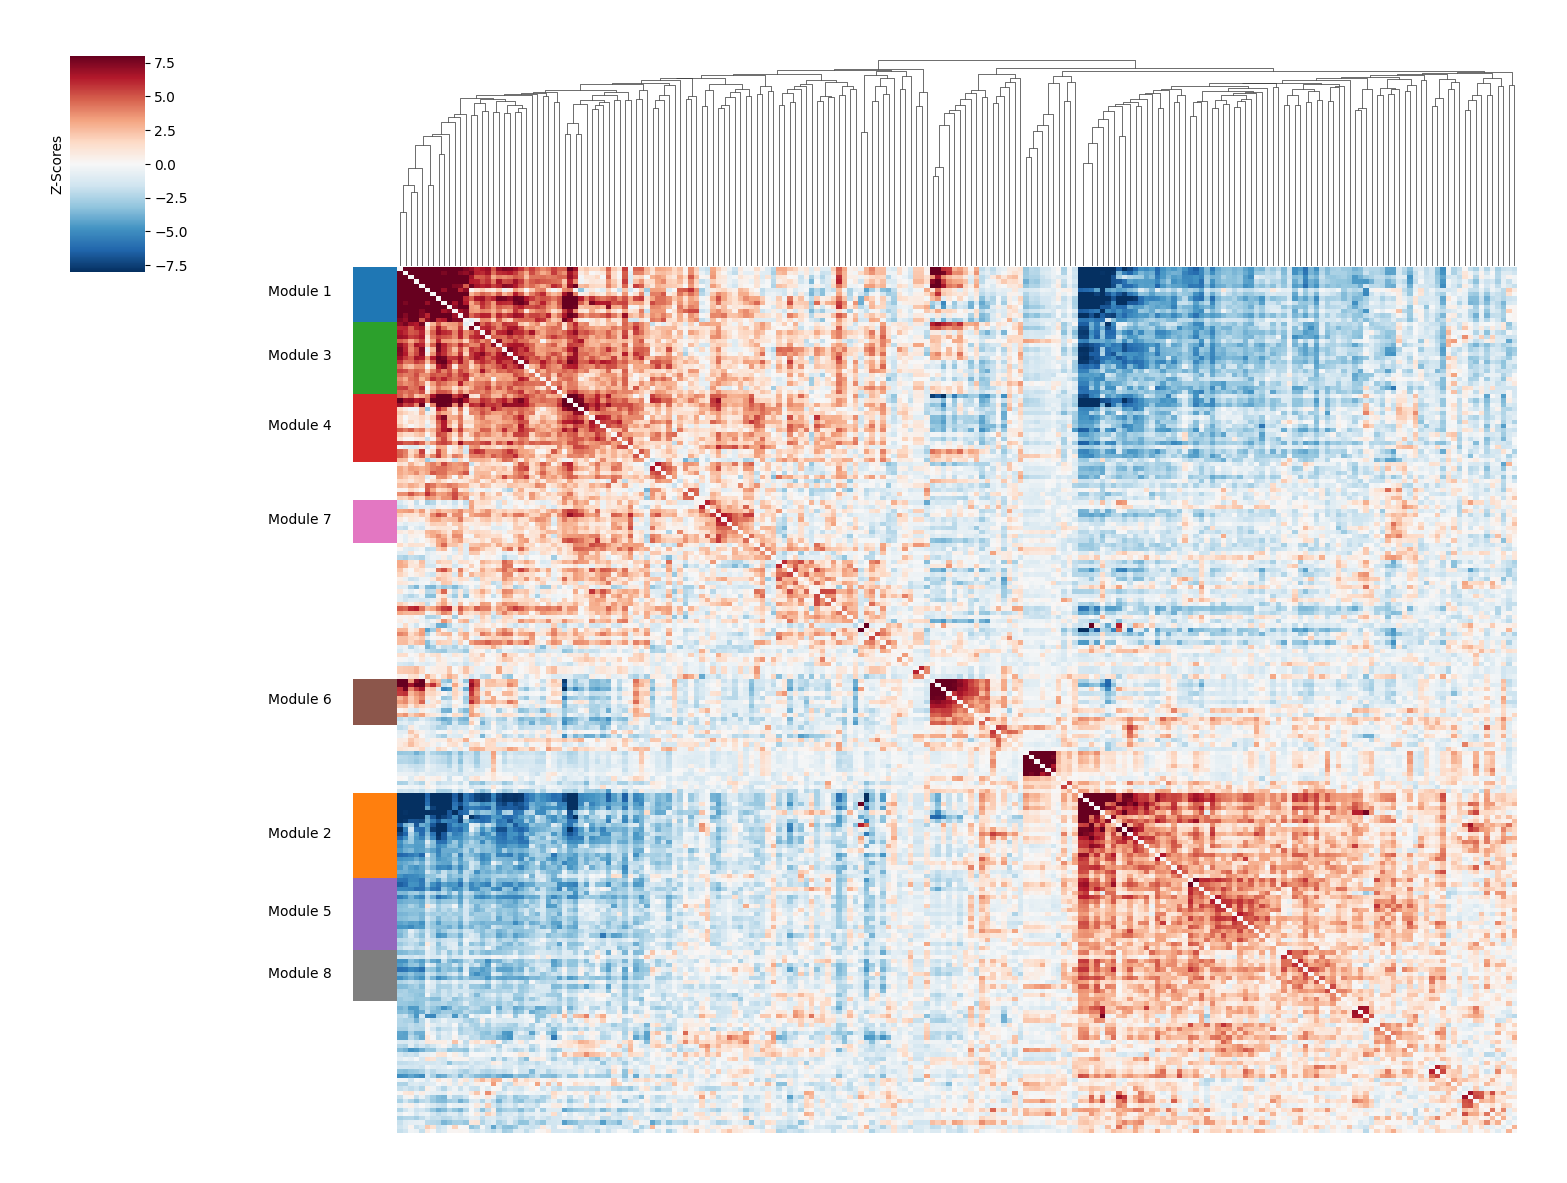

In [19]:
data.plt.hotspot_local_correlations()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

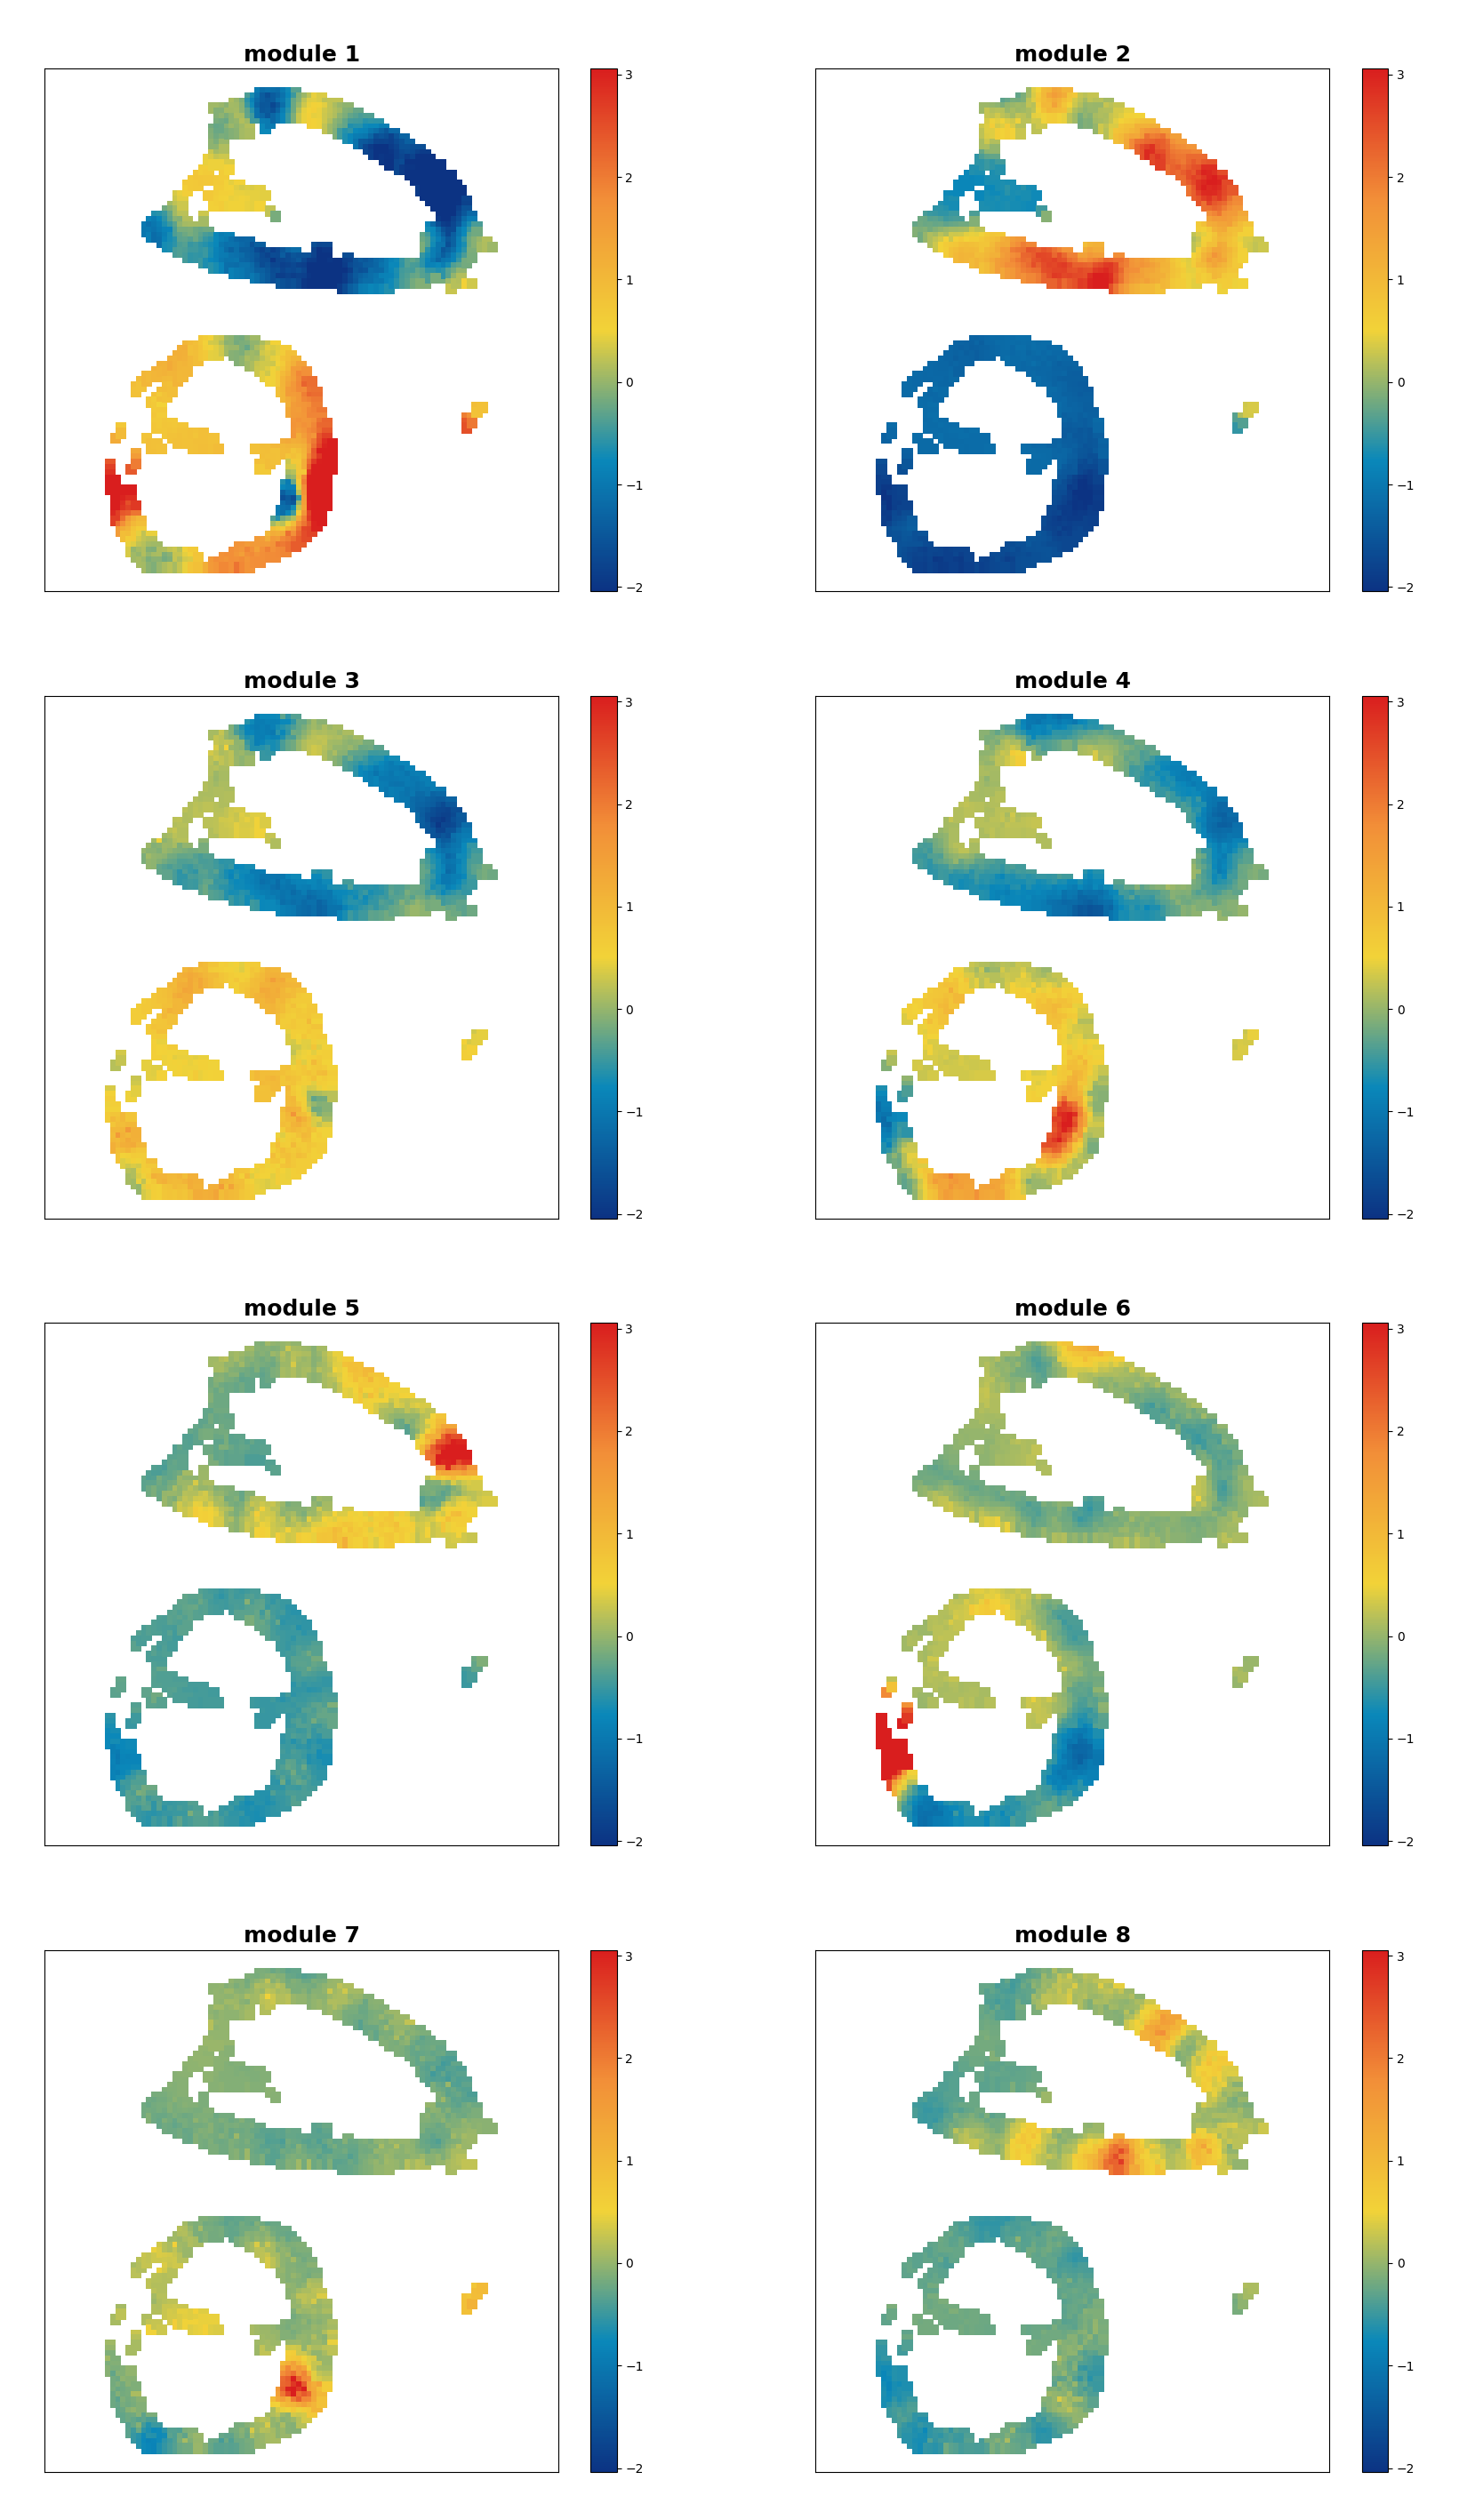

In [20]:
data.plt.hotspot_modules()

In [58]:
data.genes.to_csv("genesRAWhotspots.csv")

In [74]:
modules = data.tl.result['spatial_hotspot']
data.tl.result.CLUSTER

In [4]:
#data.tl.hotspot_local_correlation

In [13]:
missing_genes = [g for g in genesnew if g not in data.gene_names]
print(f"Missing genes ({len(missing_genes)}):", missing_genes)

Missing genes (31): ['CC.CCv1.2.scaffold1034.17', 'CC.CCv1.2.scaffold1034.20', 'CC.CCv1.2.scaffold462.15', 'CC.CCv1.2.scaffold266.71', 'CC.CCv1.2.scaffold266.72', 'CC.CCv1.2.scaffold266.117', 'CC.CCv1.2.scaffold1502.4', 'CC.CCv1.2.scaffold1453.9', 'CC.CCv1.2.scaffold303.50', 'CC.CCv1.2.scaffold384.2', 'CC.CCv1.2.scaffold383.30', 'CC.CCv1.2.scaffold439.2', 'CC.CCv1.2.scaffold958.2', 'CC.CCv1.2.scaffold819.9', 'CC.CCv1.2.scaffold494.67', 'CC.CCv1.2.scaffold303.51', 'CC.CCv1.2.scaffold206.7', 'CC.CCv1.2.scaffold320.31', 'CC.CCv1.2.scaffold320.32', 'CC.CCv1.2.scaffold551.7', 'CC.CCv1.2.scaffold648.72', 'CC.CCv1.2.scaffold1046.24', 'CC.CCv1.2.scaffold1053.10', 'CC.CCv1.2.scaffold1170.1', 'CC.CCv1.2.scaffold376.94', 'CC.CCv1.2.scaffold376.100', 'CC.CCv1.2.scaffold806.9', 'CC.CCv1.2.scaffold605.72', 'CC.CCv1.2.scaffold605.73', 'CC.CCv1.2.scaffold605.74', 'CC.CCv1.2.scaffold605.75']


Traceback (most recent call last):
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\pyviz_comms\__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\panel\viewable.py", line 297, in _on_msg
 patch.apply_to_document(doc, comm.id if comm else None)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\protocol\messages\patch_doc.py", line 115, in apply_to_document
 invoke_with_curdoc(doc, lambda: doc.apply_json_patch(self.content, setter))
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\protocol\messages\patch_doc.py", line 115, in <lambda>
 invoke_with_curdoc(doc, lambda: doc.apply_json_patch(self.content, setter))
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\document.py", line 391, in apply_json_patch
 DocumentPatchedEvent.handle_json(self, event_json, references, setter)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\events.py", line 259, in handle_json
 handler(doc, event_json, references, setter)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\events.py", line 300, in _handle_json
 cb(event_json["msg_data"])
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\callbacks.py", line 355, in trigger_json_event
 model._trigger_event(event)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\util\callback_manager.py", line 119, in _trigger_event
 self.document.callbacks.notify_event(cast(Model, self), event, invoke)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\callbacks.py", line 247, in notify_event
 invoke_with_curdoc(doc, callback_invoker)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\document\callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\bokeh\util\callback_manager.py", line 115, in invoke
 cast(EventCallbackWithEvent, callback)(event)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\panel\reactive.py", line 413, in _comm_event
 state._handle_exception(e)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\panel\io\state.py", line 408, in _handle_exception
 raise exception
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\panel\reactive.py", line 411, in _comm_event
 self._process_bokeh_event(doc, event)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\panel\reactive.py", line 348, in _process_bokeh_event
 self._process_event(event)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\panel\widgets\button.py", line 184, in _process_event
 self.clicks += 1
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\parameterized.py", line 367, in _f
 instance_param.__set__(obj, val)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\parameterized.py", line 369, in _f
 return f(self, obj, val)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\__init__.py", line 625, in __set__
 super(Dynamic,self).__set__(obj,val)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\parameterized.py", line 369, in _f
 return f(self, obj, val)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\parameterized.py", line 1252, in __set__
 obj.param._call_watcher(watcher, event)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\parameterized.py", line 2043, in _call_watcher
 self_._execute_watcher(watcher, (event,))
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\param\parameterized.py", line 2025, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\Student\anaconda3\envs\st\lib\site-packages\stereo\plots\decorator.py", line 68, in _action
 figure.savefig(out_path, bbox_inches='tight', dpi=dpi)
 File "C:\Users\Student\anacond

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

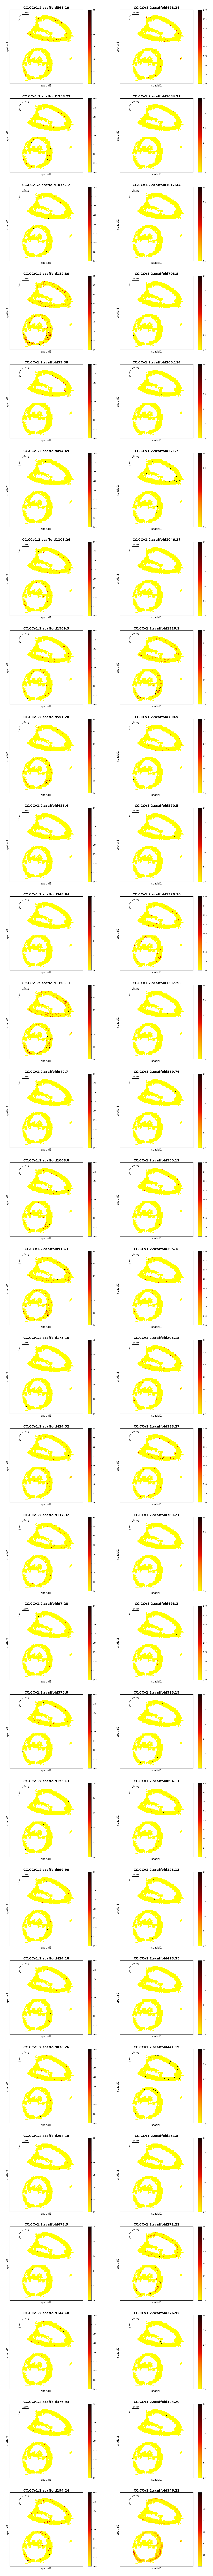

In [20]:
genes = [
    "CC.CCv1.2.scaffold561.19",
    "CC.CCv1.2.scaffold498.34",
    "CC.CCv1.2.scaffold1258.22",
    "CC.CCv1.2.scaffold1034.21",
    "CC.CCv1.2.scaffold1075.12",
    "CC.CCv1.2.scaffold101.144",
    "CC.CCv1.2.scaffold112.30",
    "CC.CCv1.2.scaffold703.8",
    "CC.CCv1.2.scaffold33.38",
    "CC.CCv1.2.scaffold266.114",
    "CC.CCv1.2.scaffold494.49",
    "CC.CCv1.2.scaffold271.7",
    "CC.CCv1.2.scaffold1103.26",
    "CC.CCv1.2.scaffold1046.27",
    "CC.CCv1.2.scaffold1569.3",
    "CC.CCv1.2.scaffold1326.1",
    "CC.CCv1.2.scaffold551.28",
    "CC.CCv1.2.scaffold708.5",
    "CC.CCv1.2.scaffold458.4",
    "CC.CCv1.2.scaffold570.5",
    "CC.CCv1.2.scaffold348.64",
    "CC.CCv1.2.scaffold1320.10",
    "CC.CCv1.2.scaffold1320.11",
    "CC.CCv1.2.scaffold1397.20",
    "CC.CCv1.2.scaffold942.7",
    "CC.CCv1.2.scaffold589.76",
    "CC.CCv1.2.scaffold1008.8",
    "CC.CCv1.2.scaffold550.13",
    "CC.CCv1.2.scaffold918.3",
    "CC.CCv1.2.scaffold395.18",
    "CC.CCv1.2.scaffold175.10",
    "CC.CCv1.2.scaffold206.18",
    "CC.CCv1.2.scaffold424.52",
    "CC.CCv1.2.scaffold383.27",
    "CC.CCv1.2.scaffold117.32",
    "CC.CCv1.2.scaffold760.21",
    "CC.CCv1.2.scaffold97.28",
    "CC.CCv1.2.scaffold498.3",
    "CC.CCv1.2.scaffold375.8",
    "CC.CCv1.2.scaffold516.15",
    "CC.CCv1.2.scaffold1259.3",
    "CC.CCv1.2.scaffold894.11",
    "CC.CCv1.2.scaffold699.90",
    "CC.CCv1.2.scaffold128.13",
    "CC.CCv1.2.scaffold424.18",
    "CC.CCv1.2.scaffold493.35",
    "CC.CCv1.2.scaffold876.26",
    "CC.CCv1.2.scaffold441.19",
    "CC.CCv1.2.scaffold294.18",
    "CC.CCv1.2.scaffold261.8",
    "CC.CCv1.2.scaffold673.3",
    "CC.CCv1.2.scaffold271.21",
    "CC.CCv1.2.scaffold1443.8",
    "CC.CCv1.2.scaffold376.92",
    "CC.CCv1.2.scaffold376.93",
    "CC.CCv1.2.scaffold424.20",
    "CC.CCv1.2.scaffold194.24",
    "CC.CCv1.2.scaffold346.22"
]



data.plt.spatial_scatter_by_gene(genes,
            dot_size=15, palette='CET_L4')

In [11]:
ap2_gene_list = [
    "CC.CCv1.2.scaffold1103.26",
    "CC.CCv1.2.scaffold1453.9",
    "CC.CCv1.2.scaffold498.34",
    "CC.CCv1.2.scaffold294.18",
    "CC.CCv1.2.scaffold1053.10",
    "CC.CCv1.2.scaffold1170.1",
    "CC.CCv1.2.scaffold142.23",
    "CC.CCv1.2.scaffold279.29",
    "CC.CCv1.2.scaffold483.16",
    "CC.CCv1.2.scaffold611.27",
    "CC.CCv1.2.scaffold700.29",
    "CC.CCv1.2.scaffold738.45",
    "CC.CCv1.2.scaffold1103.27"
]



In [20]:
ppr_gene_list = [
    "CC.CCv1.2.scaffold1502.4",
    "CC.CCv1.2.scaffold439.2",
    "CC.CCv1.2.scaffold516.15",
    "CC.CCv1.2.scaffold424.18",
    "CC.CCv1.2.scaffold493.35",
    "CC.CCv1.2.scaffold424.20",
    "CC.CCv1.2.scaffold348.64",
    "CC.CCv1.2.scaffold1154.4",
    "CC.CCv1.2.scaffold1019.8",
    "CC.CCv1.2.scaffold266.62",
    "CC.CCv1.2.scaffold232.17",
    "CC.CCv1.2.scaffold162.24",
    "CC.CCv1.2.scaffold121.54",
    "CC.CCv1.2.scaffold179.32",
    "CC.CCv1.2.scaffold266.23",
    "CC.CCv1.2.scaffold266.162",
    "CC.CCv1.2.scaffold319.45",
    "CC.CCv1.2.scaffold1017.5",
    "CC.CCv1.2.scaffold266.52",
    "CC.CCv1.2.scaffold539.11",
    "CC.CCv1.2.scaffold336.44",
    "CC.CCv1.2.scaffold1184.11",
    "CC.CCv1.2.scaffold271.128",
    "CC.CCv1.2.scaffold360.74",
    "CC.CCv1.2.scaffold242.24",
    "CC.CCv1.2.scaffold1893.1",
    "CC.CCv1.2.scaffold1128.24",
    "CC.CCv1.2.scaffold1059.8",
    "CC.CCv1.2.scaffold101.30",
    "CC.CCv1.2.scaffold1047.5",
    "CC.CCv1.2.scaffold1182.21",
    "CC.CCv1.2.scaffold1227.16",
    "CC.CCv1.2.scaffold1236.17",
    "CC.CCv1.2.scaffold1236.28",
    "CC.CCv1.2.scaffold1306.2",
    "CC.CCv1.2.scaffold1501.7",
    "CC.CCv1.2.scaffold162.17",
    "CC.CCv1.2.scaffold179.39",
    "CC.CCv1.2.scaffold186.39",
    "CC.CCv1.2.scaffold240.8",
    "CC.CCv1.2.scaffold266.158",
    "CC.CCv1.2.scaffold300.21",
    "CC.CCv1.2.scaffold325.6",
    "CC.CCv1.2.scaffold386.63",
    "CC.CCv1.2.scaffold398.71",
    "CC.CCv1.2.scaffold424.92",
    "CC.CCv1.2.scaffold468.7",
    "CC.CCv1.2.scaffold528.9",
    "CC.CCv1.2.scaffold592.63",
    "CC.CCv1.2.scaffold646.19",
    "CC.CCv1.2.scaffold891.17",
    "CC.CCv1.2.scaffold112.9",
    "CC.CCv1.2.scaffold1176.1",
    "CC.CCv1.2.scaffold15.85",
    "CC.CCv1.2.scaffold225.15",
    "CC.CCv1.2.scaffold299.12",
    "CC.CCv1.2.scaffold364.101",
    "CC.CCv1.2.scaffold704.33",
    "CC.CCv1.2.scaffold87.43"
]


In [11]:
genes_september2025 = [
    "CC.CCv1.2.scaffold271.126",
    "CC.CCv1.2.scaffold384.6",
    "CC.CCv1.2.scaffold289.59",
    "CC.CCv1.2.scaffold271.154",
    "CC.CCv1.2.scaffold537.3",
    "CC.CCv1.2.scaffold398.36",
    "CC.CCv1.2.scaffold401.117",
    "CC.CCv1.2.scaffold648.47",
    "CC.CCv1.2.scaffold1388.5",
    "CC.CCv1.2.scaffold536.11",
    "CC.CCv1.2.scaffold29.3",
    "CC.CCv1.2.scaffold271.46",
    "CC.CCv1.2.scaffold572.5"
]


In [ ]:
import os
import matplotlib.pyplot as plt

output_dir = "D:Satish Spatial/ap2_genes"
os.makedirs(output_dir, exist_ok=True)

for gene in ap2_gene_list:
    data.plt.spatial_scatter_by_gene(gene, dot_size=5, palette='CET_L4')
    plt.savefig(f"{output_dir}/{gene}.png", dpi=1200, bbox_inches='tight')
    plt.close()


In [19]:
available_genes = set(data.gene_names)

for gene in ap2_gene_list:
    if gene in available_genes:
        data.plt.spatial_scatter_by_gene(gene, dot_size=5, palette='CET_L4')
        plt.savefig(f"{output_dir}/{gene}.png", dpi=1200, bbox_inches='tight')
        plt.close() 
    else:
        print(f"Gene '{gene}' not found in the dataset.")


Gene 'CC.CCv1.2.scaffold1453.9' not found in the dataset.
Gene 'CC.CCv1.2.scaffold1053.10' not found in the dataset.
Gene 'CC.CCv1.2.scaffold1170.1' not found in the dataset.


In [22]:
output_dir_ppr = "D:Satish Spatial/PPR_genes"
os.makedirs(output_dir_ppr, exist_ok=True)
for gene in ppr_gene_list:
    if gene in available_genes:
        data.plt.spatial_scatter_by_gene(gene, dot_size=5, palette='CET_L4')
        plt.savefig(f"{output_dir_ppr}/{gene}.png", dpi=1200, bbox_inches='tight')
        plt.close() 
    else:
        print(f"Gene '{gene}' not found in the dataset.")

Gene 'CC.CCv1.2.scaffold1502.4' not found in the dataset.
Gene 'CC.CCv1.2.scaffold439.2' not found in the dataset.
Gene 'CC.CCv1.2.scaffold319.45' not found in the dataset.
Gene 'CC.CCv1.2.scaffold1236.17' not found in the dataset.
Gene 'CC.CCv1.2.scaffold179.39' not found in the dataset.
Gene 'CC.CCv1.2.scaffold468.7' not found in the dataset.


In [9]:
data_ann = 'Desktop/GerardoIga/2024/Satish/Spatial/Anndata.h5ad'
st.io.read_ann_h5ad(data_ann)
dataann = st.io.read_ann_h5ad(data_ann)

In [10]:
dataann.tl.cal_qc()
dataann.tl.raw_checkpoint()
dataann.tl.normalize_total(target_sum=1e4)
dataann.tl.log1p()
dataann.tl.highly_variable_genes(min_mean=0.0125, max_mean=3, min_disp=0.5, res_key='highly_variable_genes', n_top_genes=None)
dataann.tl.pca(use_highly_genes=True, hvg_res_key='highly_variable_genes', n_pcs=20, res_key='pca_test', svd_solver='arpack')
dataann.tl.neighbors(pca_res_key='pca_test', n_pcs=30, res_key='neighbors_test', n_jobs=8)
dataann.tl.umap(pca_res_key='pca_test', neighbors_res_key='neighbors_test', res_key='umap_test', init_pos='spectral')
dataann.tl.leiden(neighbors_res_key='neighbors_test', res_key='leiden_test')

[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][41][INFO]: start to run cal_qc...
[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][44][INFO]: cal_qc end, consume time 0.1477s.
[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][41][INFO]: start to run normalize_total...
[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][44][INFO]: normalize_total end, consume time 0.0287s.
[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][41][INFO]: start to run log1p...
[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][44][INFO]: log1p end, consume time 0.0404s.
[2025-02-13 11:04:13][Stereo][22520][MainThread][17120][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2025-02-13 11:04:14][Stereo][22520][MainThread][17120][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.9570s.
[2025-02-13 11:04:14][Stereo][22520][MainThread][17120][st_pipeline][41][INFO]: start 

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


[2025-02-13 11:05:01][Stereo][22520][MainThread][17120][st_pipeline][44][INFO]: umap end, consume time 12.1334s.
[2025-02-13 11:05:01][Stereo][22520][MainThread][17120][st_pipeline][41][INFO]: start to run leiden...
[2025-02-13 11:05:01][Stereo][22520][MainThread][17120][st_pipeline][44][INFO]: leiden end, consume time 0.5512s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

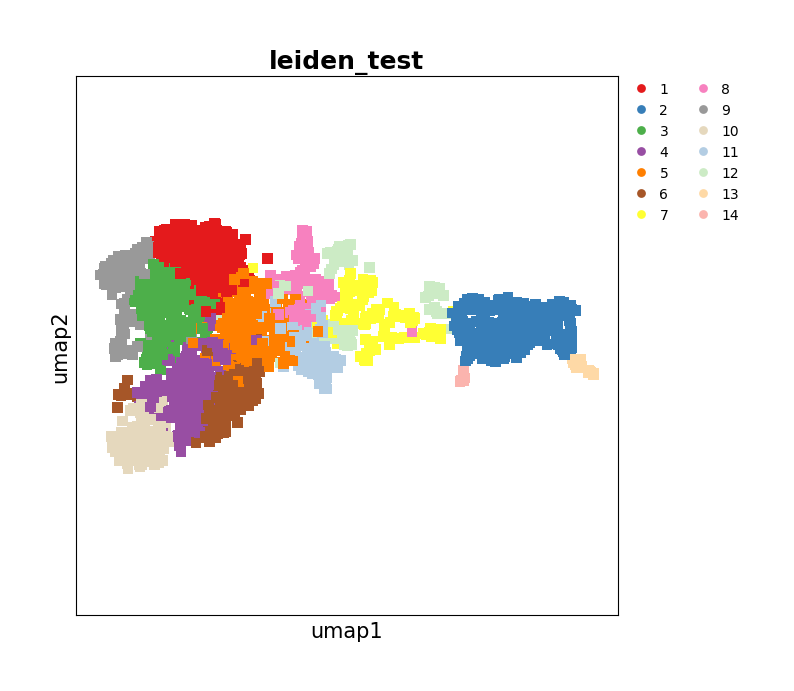

In [11]:
dataann.plt.umap(res_key='umap_test', cluster_key='leiden_test')

In [13]:
import os
import matplotlib.pyplot as plt
output_dir = "D:Satish Spatial/September_genes"
os.makedirs(output_dir, exist_ok=True)

for gene in genes_september2025:
    if gene not in data.gene_names:
        print(f"Skipping {gene}, not found in data")
        continue
    data.plt.spatial_scatter_by_gene(gene, dot_size=5, palette='CET_L4')
    plt.savefig(f"{output_dir}/{gene}.png", dpi=1200, bbox_inches='tight')
    plt.close()

Skipping CC.CCv1.2.scaffold384.6, not found in data
Skipping CC.CCv1.2.scaffold289.59, not found in data
Skipping CC.CCv1.2.scaffold537.3, not found in data
Skipping CC.CCv1.2.scaffold401.117, not found in data
